In [30]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps, ImageEnhance
from sklearn.model_selection import train_test_split
import cv2

In [31]:
path = 'C:/Users/Aimee Langevin/QMIND/Diabetic-Retinopathy-Detection/dataset_images'

images = []

for file in os.listdir(path):
    img_path = os.path.join(path, file)
    images.append(img_path)

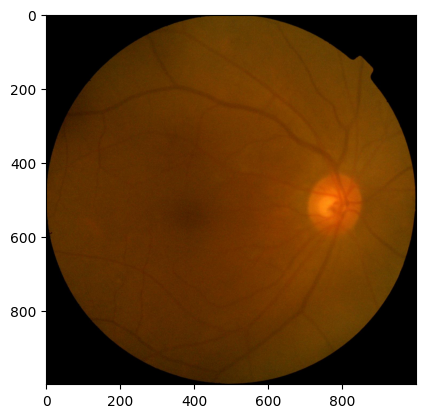

In [36]:
resized_images = []

#Using only 10 images so my computer doesn't crash
for i in range(0, 10):
    try:
        image = Image.open(images[i])
        resized_img = image.resize((1000,1000))
        resized_images.append(resized_img)
    except (OSError, IOError) as e:
        print("Error")

#check they have been resized 
plt.imshow(resized_images[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


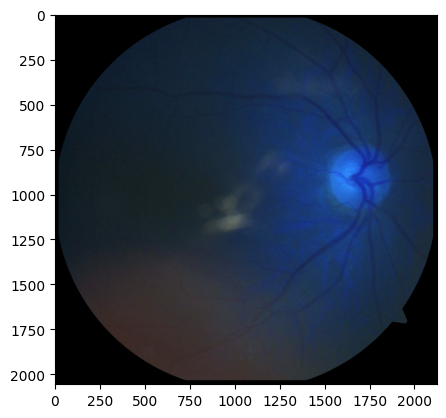

In [39]:
im = []

for i in range(0, 10):
    try:
        image = cv2.imread(images[i])
        norm = image / 255
        im.append(norm)
    except (OSError) as e:
        print("Error")

plt.imshow(im[3])
print(im[0])

In [ ]:
#train-test split (no labels yet)
X_train, X_test, y_train, y_test = train_test_split(im, y, test_size=0.2, random_state=42)

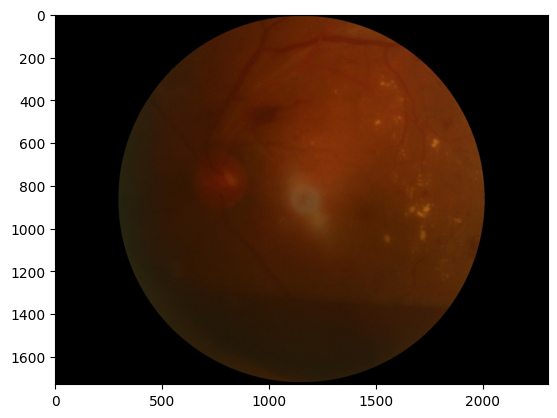

In [26]:
#dhow a proliferative image
img2 = imread(images[20])
plt.imshow(img2)

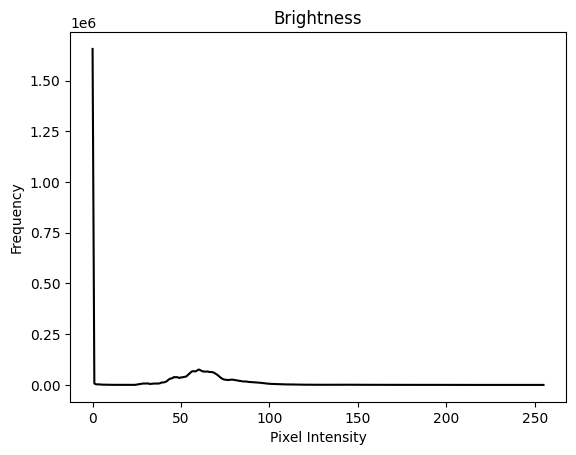

In [40]:
#histogram of the pixel values to see the brightness range
histogram_before = cv2.calcHist([img2], [0], None, [256], [0, 256])
plt.plot(histogram_before, color='black')
plt.title("Brightness")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

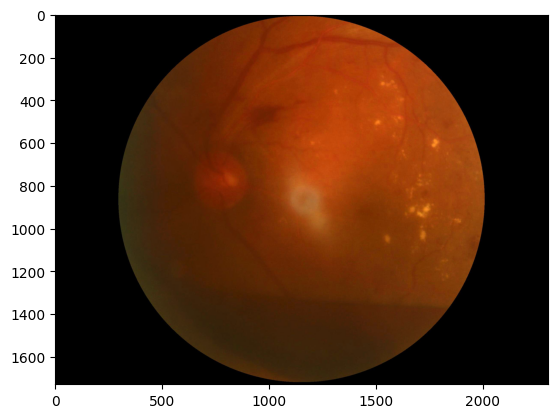

In [27]:
#METHOD 1 for increasing brightness (RGB to HSV then increase V and convert back)
image_cv = imread(images[20])
image_hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
value = image_hsv[:,:,2]
increased_v = np.clip(value*1.5, 0, 255).astype(np.uint8)
image_hsv[:,:,2] = increased_v
enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(enhanced)


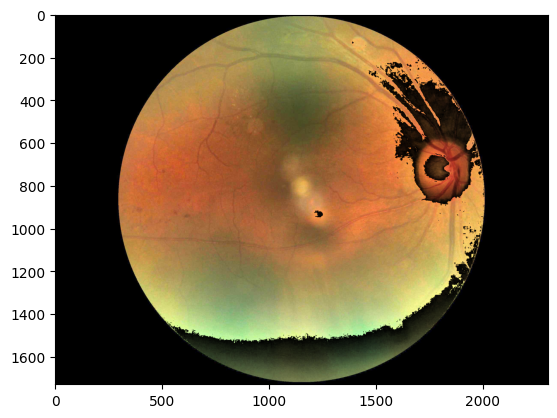

In [16]:
#same method as above but you can see that a high factor is problematic
image_cv = imread(images[7])
image_hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
value = image_hsv[:,:,2]
increased_v = np.clip(value*3, 0, 255).astype(np.uint8)
image_hsv[:,:,2] = increased_v
enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(enhanced)

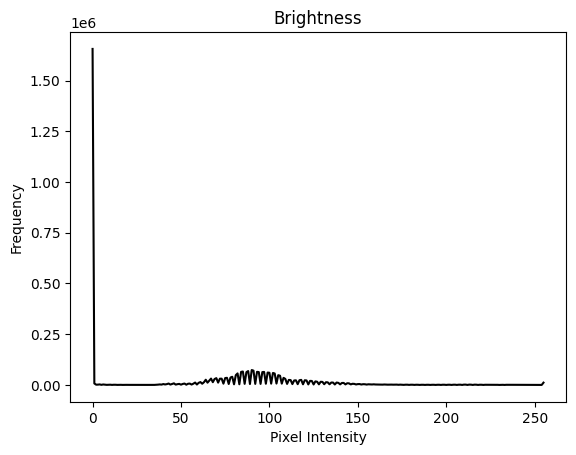

In [42]:
#histogram after brightening to see the pixel value difference
histogram_after = cv2.calcHist([enhanced], [0], None, [256], [0, 256])
plt.plot(histogram_after, color='black')
plt.title("Brightness")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

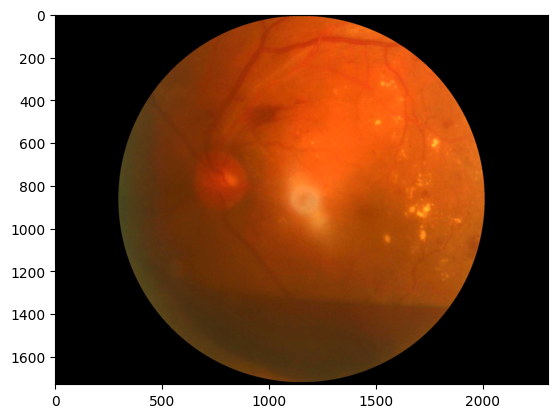

In [41]:
#METHOD 2 for increasing brightness (works much better)
image = Image.open(images[20])
enhancer = ImageEnhance.Brightness(image)
img_bright = enhancer.enhance(2)

plt.imshow(img_bright)

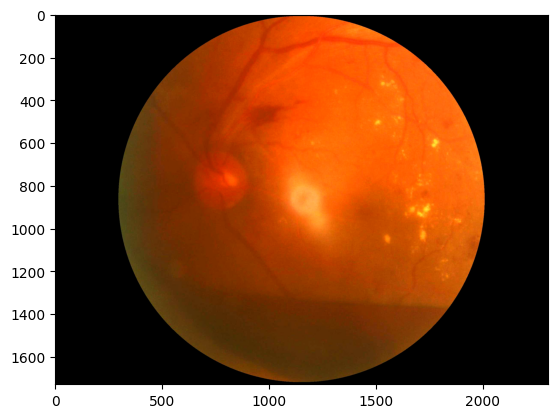

In [42]:
#method 2 also has contrast adjustment
image_contrast = Image.open(images[7])
enhancer = ImageEnhance.Contrast(img_bright)
img_c = enhancer.enhance(1.25)

plt.imshow(img_c)